# Elbow method for estimating number of clusters

Done loading
Done generating pixel columns
Fitting model 1/10...
Fitting model 2/10...
Fitting model 3/10...
Fitting model 4/10...
Fitting model 5/10...
Fitting model 6/10...
Fitting model 7/10...
Fitting model 8/10...
Fitting model 9/10...
Fitting model 10/10...


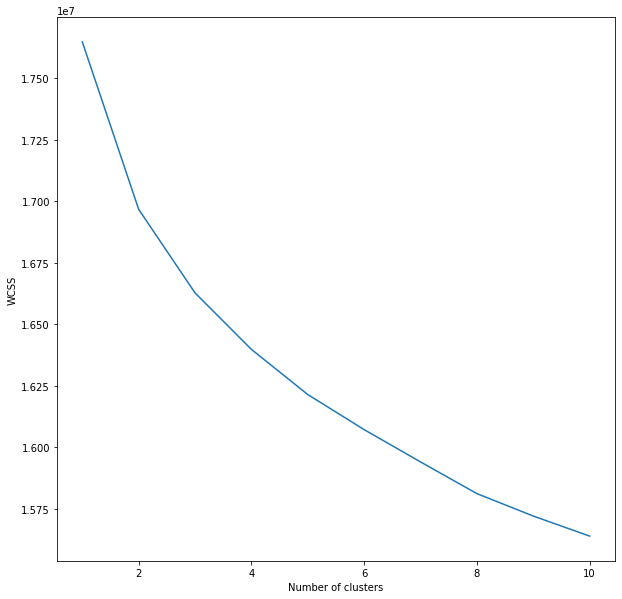

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from utils import extract_first_entries, generate_pixel_columns

file = './dataset/power outlet.ndjson'
df = extract_first_entries(file, recognized=True)
print('Done loading')
df = generate_pixel_columns(df, 32, 1, True)
print('Done generating pixel columns')
x = df.filter(regex=('pixel.+'))
y = df['countrycode']

wcss = []
for i in range(1,11):
   print(f'Fitting model {i}/10...')
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Exlporing unsupervised clustering algorithms

Done transforming data
Done fitting model KMeans


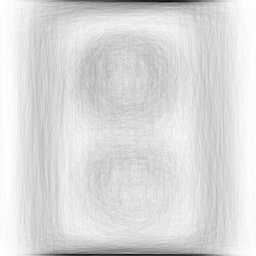

Entries: 89954


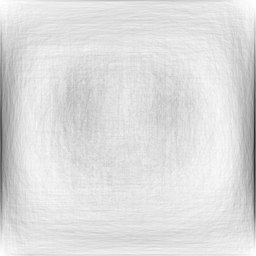

Entries: 57588


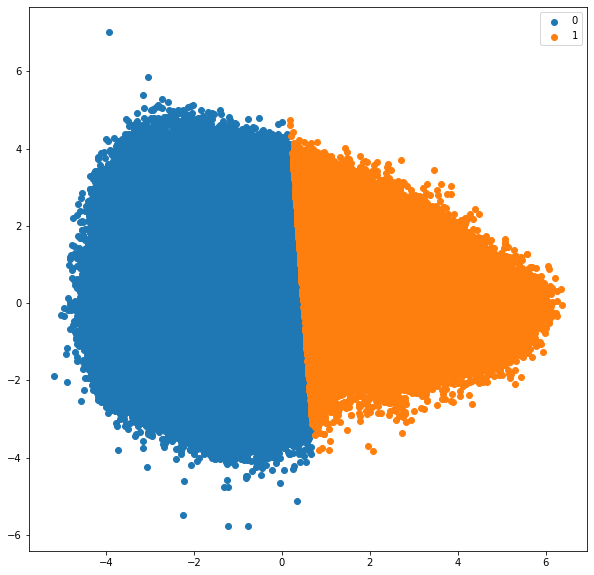

Done fitting model Birch


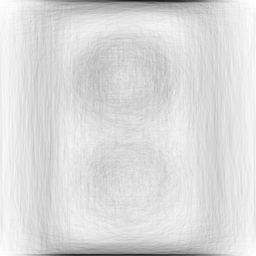

Entries: 107589


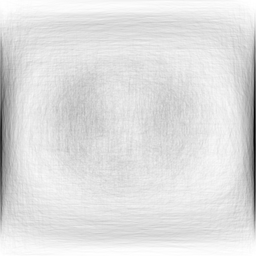

Entries: 39953


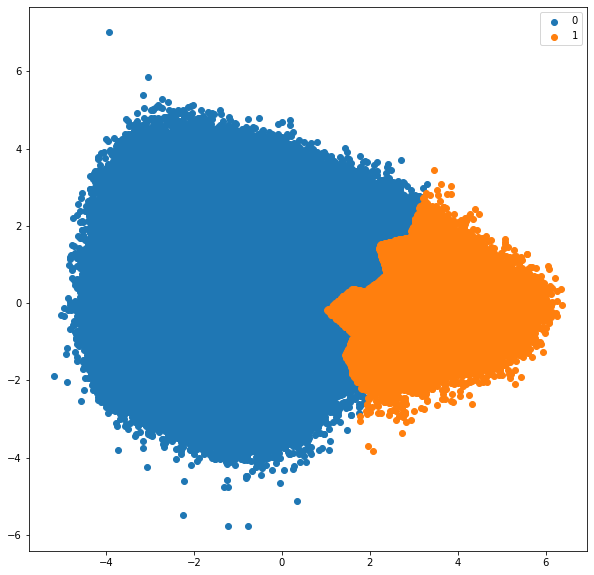

Done fitting model Gaussian


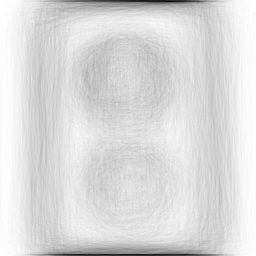

Entries: 90585


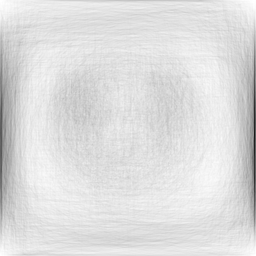

Entries: 56957


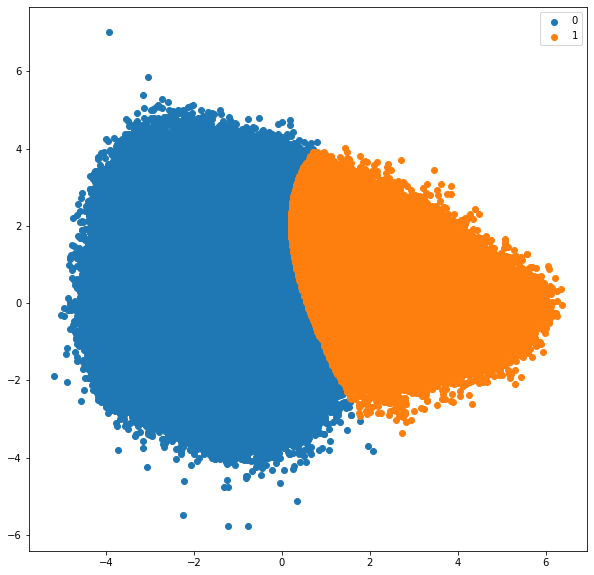

In [3]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, SpectralClustering, Birch, MeanShift, OPTICS, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph
from IPython.display import display, Image as ipimg
from utils import render_multiple
from sklearn.ensemble import IsolationForest

num_clusters = 2
pca = PCA(2)
data = pca.fit_transform(x)
print('Done transforming data')
# con = kneighbors_graph(data, n_neighbors=10, include_self=False)

# outlier_det = IsolationForest(random_state=42)
# outliers = outlier_det.fit_predict(data)

# bandwidth = estimate_bandwidth(x, quantile=.1)
# print('Done with bandwidth estimation')

clsts = {
    'KMeans': KMeans(n_clusters = num_clusters, init = "k-means++"),
    # 'AgglomerativeAverage': AgglomerativeClustering(
    #     linkage='average',
    #     affinity="cityblock",
    #     n_clusters=num_clusters,
    #     connectivity=con
    # ),
    # 'AgglomerativeWard': AgglomerativeClustering(
    #     linkage='ward',
    #     n_clusters=num_clusters,
    #     connectivity=con
    # ),
    # 'SpectralClustering': SpectralClustering(
    #     n_clusters=num_clusters,
    #     eigen_solver="arpack",
    #     affinity="nearest_neighbors",
    # ),
    'Birch': Birch(n_clusters=num_clusters),
    'Gaussian': GaussianMixture(
        n_components=num_clusters, covariance_type="full"
    ),
    # 'MeanShift': MeanShift(bandwidth=bandwidth, bin_seeding=True),
    # 'OPTICS': OPTICS(min_cluster_size=.1,xi=.05,min_samples=20),
    # 'DBSCAN': DBSCAN(eps=.3)
}

df3 = pd.DataFrame(data)
df3['drawing'] = df['drawing']
df3['countrycode'] = y
# df3['outlier'] = np.array(map(lambda n: 1 if n < 0 else 0, outliers))
# df3 = df3[df3['outlier'] == 0]
for typ, clst in clsts.items():
    pixels = df3.filter(regex='[01]')
    model = clst.fit_predict(pixels)
    print(f"Done fitting model {typ}")

    plt.figure(figsize=(10,10))
    clusters = np.unique(model)

    for cluster in clusters:
        drawings = df3[model == cluster]['drawing']
        display(ipimg(render_multiple(drawings if len(drawings) < 2000 else drawings.sample(2000))))
        print(f'Entries: {len(drawings)}')
        plt.scatter(df3[model == cluster][0] , df3[model == cluster][1] , label = cluster)
    plt.legend()

    # data2 = pd.DataFrame(data)
    # data2['countrycode'] = y
    # data2['outlier'] = np.array(map(lambda n: 1 if n < 0 else 0, outliers))
    # country = df3[df3['countrycode'].isin(['RO', 'BR'])]
    # plt.scatter(country[0], country[1], marker='.', color='k')
    # plt.scatter(data2[data2['outlier'] == 1][0], data2[data2['outlier'] == 1][1], c='red')

    plt.show()
    plt.close()

# Unsupervised clustering analysis

In [41]:
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, SpectralClustering, Birch, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import kneighbors_graph
from IPython.display import display, Image as ipimg
from PIL import Image as pilimg
from utils import render_multiple
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from utils import extract_first_entries, generate_pixel_columns
import os, io

files = {
    './dataset/ambulance.ndjson' :2,
    './dataset/bed.ndjson' :2,
    './dataset/bench.ndjson' :2,
    './dataset/bread.ndjson' :2,
    './dataset/castle.ndjson' :3,
    './dataset/cell phone.ndjson' :2,
    './dataset/chair.ndjson' :3,
    './dataset/church.ndjson' :2,
    './dataset/coffee cup.ndjson' :3,
    './dataset/crown.ndjson' :2,
    './dataset/cup.ndjson' :2,
    './dataset/diamond.ndjson' :2,
    './dataset/dishwasher.ndjson' :2,
    './dataset/dresser.ndjson' :2,
    './dataset/eye.ndjson' :2,
    './dataset/face.ndjson' :2,
    './dataset/fan.ndjson' :2,
    './dataset/fire hydrant.ndjson' :2,
    './dataset/fish.ndjson' :2,
    './dataset/hammer.ndjson' :2,
    './dataset/hat.ndjson' :3,
    './dataset/helicopter.ndjson' :3,
    './dataset/ice cream.ndjson' :2,
    './dataset/lantern.ndjson' :2,
    './dataset/passport.ndjson' :2,
    './dataset/pickup truck.ndjson' :2,
    './dataset/pillow.ndjson' :2,
    './dataset/power outlet.ndjson' :2,
    './dataset/sailboat.ndjson' :2,
    './dataset/sandwich.ndjson' :3,
    './dataset/snowman.ndjson' :2,
    './dataset/strawberry.ndjson' :2,
    './dataset/suitcase.ndjson' :2,
    './dataset/table.ndjson' :2,
    './dataset/telephone.ndjson' :2,
    './dataset/traffic light.ndjson' :2,
    './dataset/watermelon.ndjson' :2,
    './dataset/wine glass.ndjson' :2,
}
if not os.path.exists('./clustering'):
    os.makedirs('./clustering')

for file, num_clusters in files.items():
    print(f'Processing {file}...')
    slash_idx = file.rindex('/')
    ext_idx = file.rindex('.ndjson')
    dir_name = './clustering/' + file[slash_idx + 1:ext_idx].replace(' ', '-')
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        print(f'Created directory "{dir_name}')
    else:
        print(f'Directory "{dir_name}" already exists.')

    df = extract_first_entries(file, recognized=True)
    print('Done loading')
    df = generate_pixel_columns(df, 32, 1, True)
    print('Done generating pixel columns')
    x = df.filter(regex=('pixel.+'))
    y = df['countrycode']

    pca = PCA(2)
    data = pca.fit_transform(x)
    print('Done transforming data')

    outlier_det = IsolationForest(random_state=42)
    outliers = outlier_det.fit_predict(data)
    print('Done with outlier detection')

    # bandwidth = estimate_bandwidth(x, quantile=.1)

    clsts = {
        'KMeans': KMeans(n_clusters = num_clusters, init = "k-means++"),
        # 'Birch': Birch(n_clusters=num_clusters),
        # 'Gaussian': GaussianMixture(
        #     n_components=num_clusters, covariance_type="full"
        # ),
        # 'MeanShift': MeanShift(bandwidth=bandwidth, bin_seeding=True)
    }

    df3 = pd.DataFrame(data)
    df3['outlier'] = np.array(map(lambda n: 1 if n < 0 else 0, outliers))
    df3['drawing'] = df['drawing']
    df3['countrycode'] = y
    df3 = df3[df3['outlier'] == 0]

    for typ, clst in clsts.items():
        inner_dir = f'{dir_name}/{typ}/'
        if not os.path.exists(inner_dir):
            os.makedirs(inner_dir)
            print(f'Created directory "{inner_dir}')
        pixels = df3.filter(regex='[01]')
        model = clst.fit_predict(pixels)
        print(f"Done fitting model {typ}")

        plt.figure(figsize=(10,10))
        clusters = np.unique(model)

        for cluster in clusters:
            drawings = df3[model == cluster]['drawing']
            img = pilimg.open(io.BytesIO(render_multiple(drawings if len(drawings) < 2000 else drawings.sample(2000))))
            img.save(inner_dir + 'cluster' + str(cluster) + '.png')
            plt.scatter(df3[model == cluster][0] , df3[model == cluster][1] , label = cluster)
        plt.legend()

        plt.savefig(inner_dir + 'plot.png')
        with open(inner_dir + 'stats.txt', 'w', encoding='utf8') as stats_file:
            stats_file.write(f'total entries: {len(df3)}\n')
            for cluster in clusters:
                stats_file.write(f'cluster{cluster} entries: {len(df3[model == cluster])}\n')
        print('Done saving images.')
        plt.close()

Processing ./dataset/ambulance.ndjson...
Created directory "./clustering/ambulance
Done loading
Done generating pixel columns
Done transforming data
Done with outlier detection
Created directory "./clustering/ambulance/KMeans/
Done fitting model KMeans
Done saving images.
Processing ./dataset/bed.ndjson...
Created directory "./clustering/bed
Done loading
Done generating pixel columns
Done transforming data
Done with outlier detection
Created directory "./clustering/bed/KMeans/
Done fitting model KMeans
Done saving images.
Processing ./dataset/bench.ndjson...
Created directory "./clustering/bench
Done loading
Done generating pixel columns
Done transforming data
Done with outlier detection
Created directory "./clustering/bench/KMeans/
Done fitting model KMeans
Done saving images.
Processing ./dataset/bread.ndjson...
Created directory "./clustering/bread
Done loading
Done generating pixel columns
Done transforming data
Done with outlier detection
Created directory "./clustering/bread/KMea